In [21]:
import sys
from pathlib import Path

import os

import numpy as np

In [22]:
module_path = str(Path.cwd().parents[0].parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

from dataloader import *
from plotCreator import *

In [23]:
def combineSum(array): #combine with sum
    combinedImage = array[0].copy()
    for i in range(len(array)):
        for j in range(50):
            for k in range(50):
                for rgb in range(3):
                    # if combinedImage[j][k][rgb] < [i][j][k][rgb]:
                    combinedImage[j][k][rgb] += array[i][j][k][rgb]


    return combinedImage

In [32]:
def combineMax(array): #combine with max value
    combinedImage = array[0].copy()
    for i in range(len(array)):
        for j in range(50):
            for k in range(50):
                for rgb in range(3):
                    if combinedImage[j][k][rgb] < array[i][j][k][rgb]:
                        combinedImage[j][k][rgb] = array[i][j][k][rgb]


    return combinedImage

In [25]:
data_path = str(Path.cwd().parents[0].parents[0] / "data" / "bh" / "BH_n5_M8_res50_10000_events.h5")
bhArray = dataToArray(data_path)

In [26]:
sphdata_path = str(Path.cwd().parents[0].parents[0] / "data" / "sph" / "PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL_res50_10000_events.h5")
sphArray = dataToArray(sphdata_path)

In [27]:
bhcombinedSum = combineSum(bhArray)
sphcombinedSum = combineSum(sphArray)

In [33]:
bhcombinedMax = combineMax(bhArray)
sphcombinedMax = combineMax(sphArray)

In [35]:
print(bhcombinedSum.shape)
print(sphcombinedSum.shape)
print(bhcombinedMax.shape)
print(sphcombinedMax.shape)

(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)


In [ ]:
from matplotlib import pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


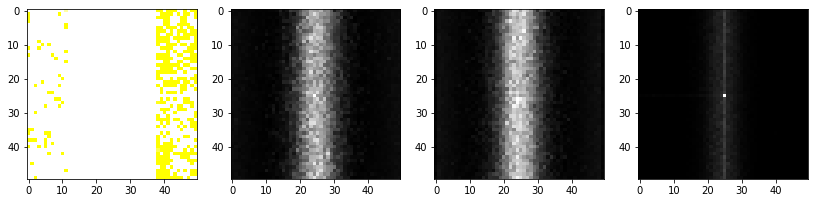

In [36]:
f, axarr = plt.subplots(1,4, figsize=(14,14))
axarr[0].imshow(bhcombinedSum, cmap='gray')
axarr[1].imshow(bhcombinedSum[:,:,0:1], cmap='gray')
axarr[2].imshow(bhcombinedSum[:,:,1:2], cmap='gray')
axarr[3].imshow(bhcombinedSum[:,:,2:3], cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


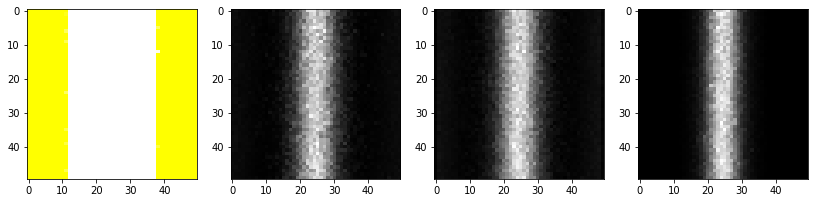

In [37]:
f, axarr = plt.subplots(1,4, figsize=(14,14))
axarr[0].imshow(sphcombinedSum, cmap='gray')
axarr[1].imshow(sphcombinedSum[:,:,0:1], cmap='gray')
axarr[2].imshow(sphcombinedSum[:,:,1:2], cmap='gray')
axarr[3].imshow(sphcombinedSum[:,:,2:3], cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


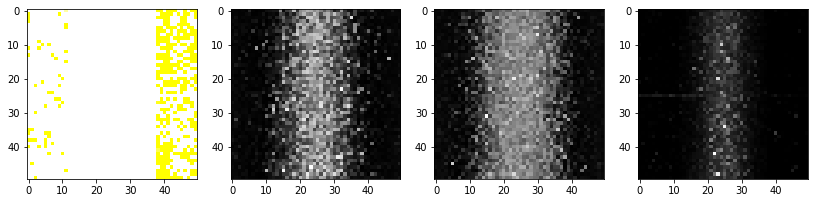

In [38]:
f, axarr = plt.subplots(1,4, figsize=(14,14))
axarr[0].imshow(bhcombinedMax, cmap='gray')
axarr[1].imshow(bhcombinedMax[:,:,0:1], cmap='gray')
axarr[2].imshow(bhcombinedMax[:,:,1:2], cmap='gray')
axarr[3].imshow(bhcombinedMax[:,:,2:3], cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


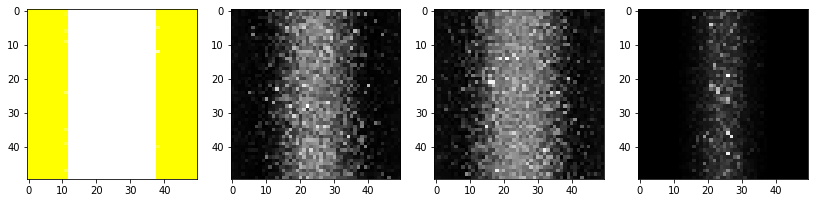

In [39]:
f, axarr = plt.subplots(1,4, figsize=(14,14))
axarr[0].imshow(sphcombinedMax, cmap='gray')
axarr[1].imshow(sphcombinedMax[:,:,0:1], cmap='gray')
axarr[2].imshow(sphcombinedMax[:,:,1:2], cmap='gray')
axarr[3].imshow(sphcombinedMax[:,:,2:3], cmap='gray')

In [40]:
print(str(np.asarray(bhcombinedSum.flatten()).sum()) + " sum of bh sum")
print(str(np.asarray(sphcombinedSum.flatten()).sum()) + " sum of sph sum")
print(str(np.asarray(bhcombinedMax.flatten()).sum()) + " sum of bh max")
print(str(np.asarray(sphcombinedMax.flatten()).sum()) + " sum of sph max")

119484260.0 sum of bh sum
111568430.0 sum of sph sum
9042296.0 sum of bh max
6173283.0 sum of sph max


119_484_260.0 sum of bh sum  
111_568_430.0 sum of sph sum  
9_042_296.0 sum of bh max  
6_173_283.0 sum of sph max  

Sum is mostly equal, but max value is not.  
Since sph value is lower in max, this means that most values are stacked in sph

In [60]:
print(np.asarray(bhArray[0]).flatten().sum())
print(np.asarray(sphArray[0]).flatten().sum())

9714.917
10110.197


In [55]:
slice = np.zeros((50,50,1))
for i in range(50):
    for j in range(50):
        for rgb in range(3):
            slice[i][j] += bhcombinedSum[i][j][rgb]


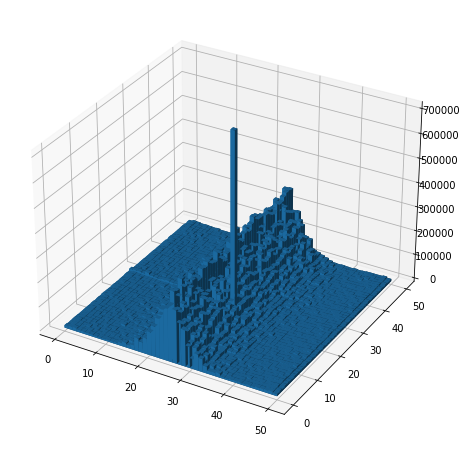

In [56]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

x_data, y_data = np.meshgrid( np.arange(slice.shape[1]),
                              np.arange(slice.shape[0]) )


x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = slice.flatten()

ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          1, 1, z_data)
plt.show()